In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



# These are some parameters to make figures nice (and big)
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Exercise 1: Unfair dice
Consider a pair of unfair dice. The probabilities for the two dice are as follows:

|Roll|Probability Dice 1|Probability Dice 2
|---|---|---|
|1|1/8|1/10|
|2|1/8|1/10|
|3|1/8|1/10|
|4|1/8|1/10|
|5|1/8|3/10|
|6|3/8|3/10|

## Question: 
Use the law of total probability. to compute the probability of rolling a total of 11. 


### Answer
We denote by $S$ the sum of the dice and by $D_1$ the value of the roll of dice 1
$$P(S=11)=\sum_{n=1}^{6}P(S=11|D_{1}=n)$$
$$P(S=11)=P(S=11|D_{1}=5)\cdot P(D_{1}=5)+P(S=11|D_{1}=6)\cdot P(D_{1}=6)$$
$$P(S=11)=P(D_{2}=6)\cdot P(D_{1}=5)+P(D_{2}=6)\cdot P(D_{1}=5)$$
$$P(S=11)=3/10\cdot1/8+3/10\cdot3/8=10/80=1/8$$


<hr style="border:2px solid black"> </hr>

# Exercise 2: Covariance vs independence
Consider two random variables, $X$ and $Y$. $X$ is uniformly distributed over the interval $\left[-1,1\right]$:

$$X\sim U[-1,1],$$

while $Y$ is normally distributed (Gaussian), with a variance equal to $X^{2}$. We would denote this as: 
$$Y|X\sim\mathcal{N}\left(0,X^{2}\right),$$
to imply that
$$P(Y=y|X=x)=p(y|x)=\left(2\pi x^2\right)^{-1/2}\exp\left[-\frac{1}{2}\left(\frac{y}{x}\right)^2\right]$$
The two random variables are obviously not independent. Indepencene requires $p(y|x)=p(y)$, which in turn would imply $p(y)=p(y|x_1)p(y|x_2)$ for $x_1\neq x_2$.
## Question 1 (Theory):
Prove analyitically that $Cov(X,Y)=0$.<br>
*Hint:* Use the relation $p(x,y)=p(y|x)p(x)$ to compute $E(XY)$. Alternatively, you can use the same relation to first prove $E(E(Y|X))$.


### Answer:
$$Cov(X,Y)=E(XY)-E(X)E(Y)=E(XY)$$
$$=\int_{-1}^{1}\int_{-\infty}^{\infty}x\cdot y\cdot p(x,y)\cdot dx\cdot dy=\int_{-1}^{1}\int_{-\infty}^{\infty}y\cdot x\cdot p(y|x)p(x)\cdot dx\cdot dy$$
$$=\int_{-1}^{1}\left[\int_{-\infty}^{\infty}y\cdot p(y|x)\cdot dy\right]x\cdot dx$$
$$=\int_{-1}^{1}\left[\int_{-\infty}^{\infty}y\cdot\frac{1}{\sqrt{2\pi x^{2}}}e^{-\frac{1}{2}\left(\frac{y}{x}\right)^{2}}\right]x\cdot dx$$
The inner integral is just the expected value of $y$ for a constant $x$, $E(Y|X)$ and it is zero, since $Y|X\sim\mathcal{N}\left(0,X^{2}\right)$. Thus, since the integrand is zero, the whole intergral is zero. 

## Question 2 (Numerical):
Show, numerically, that expected covariance is zero. 
1. Draw $n$ samples $(x_j,y_j)$ of $(X,Y)$ and plot $y_j$ vs $x_j$ for $n=100$:
2. Compute the sample covariance $s_{n-1}=\frac{1}{n-1}\sum_{j=1}^{n}(y_j-\overline y)(x_j-\overline x)$ of $X,Y$ for $n=100$. Repeat the experiment a large number of times (e.g. $M=10,000$) and plot the sampling distribution of $s_{100-1}$. What is the mean of the sampling distribution.
3. Now increase the sample size up to $n=100,000$ and plot the value of the sample covariance as a function of $n$. By the Law of Large Numbers you should see it asymptote to zero


### Answer

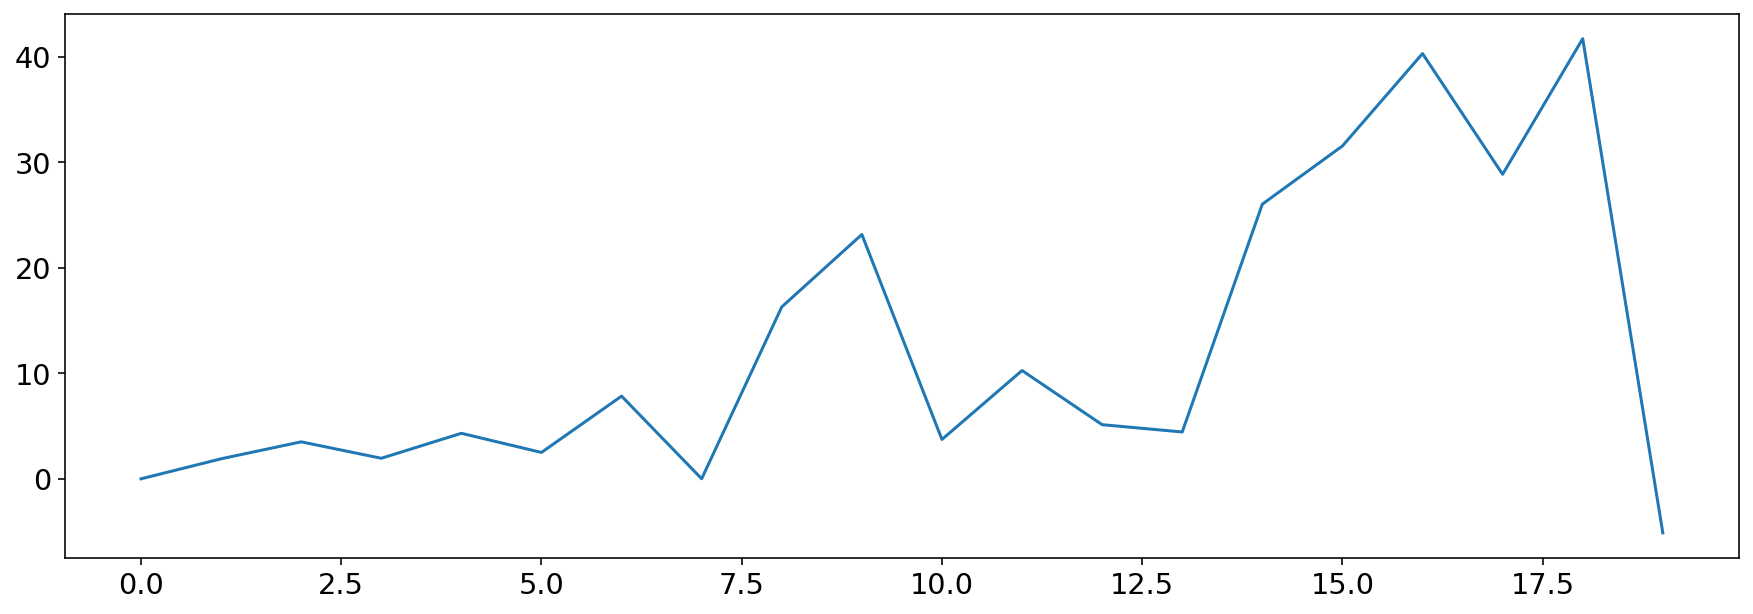

In [20]:
y=stats.norm.rvs(loc=np.arange(20),scale=np.arange(20),size=20)
plt.plot(y)

-0.058481969016028465


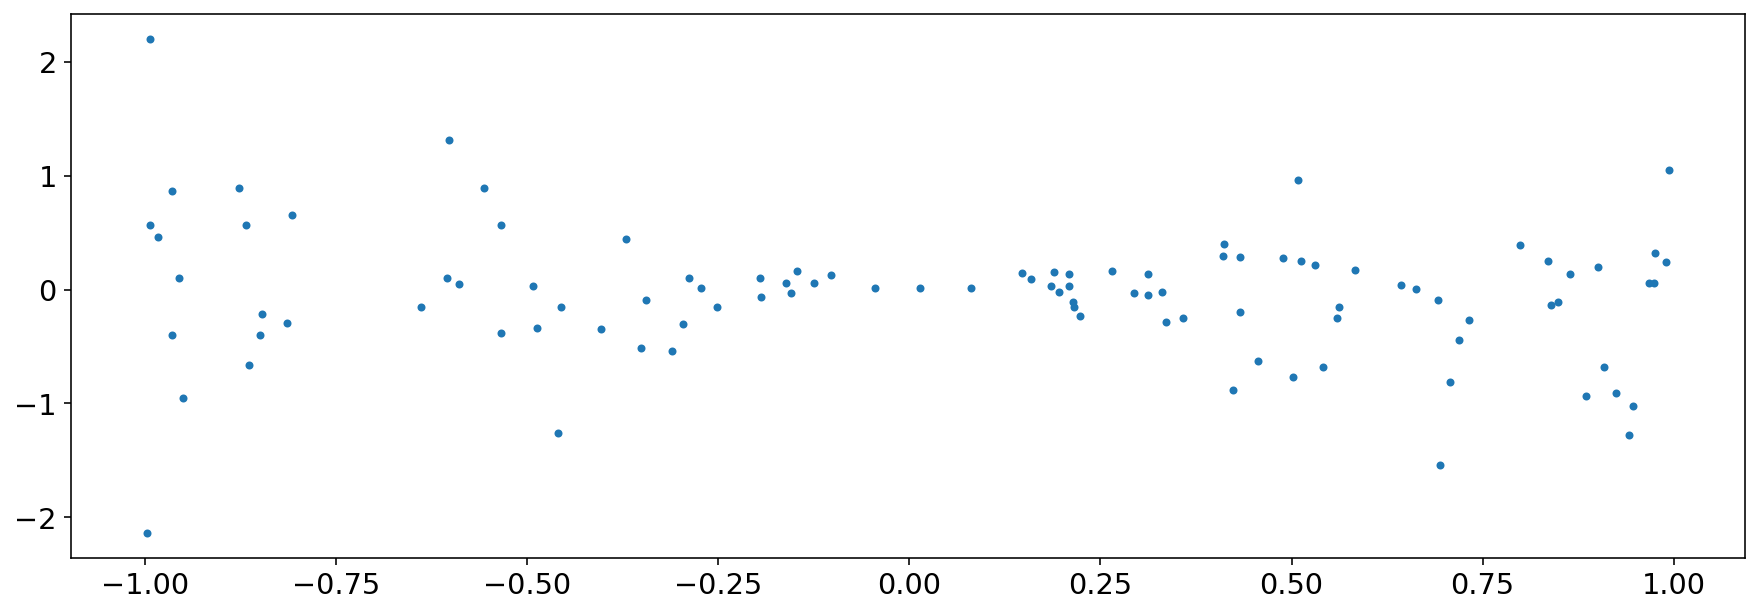

In [2]:
#2.1
Ndraws=100
X=stats.uniform.rvs(loc=-1,scale=2,size=Ndraws);
Y=np.zeros([Ndraws])
for i in range(Ndraws):
    Y[i]=stats.norm.rvs(loc=0,scale=np.abs(X[i]),size=1)
plt.plot(X,Y,'.')

scov=1/(Ndraws-1)*np.sum((X-np.mean(X))*(Y-np.mean(Y)))
print(scov)

0.0017581522990870384


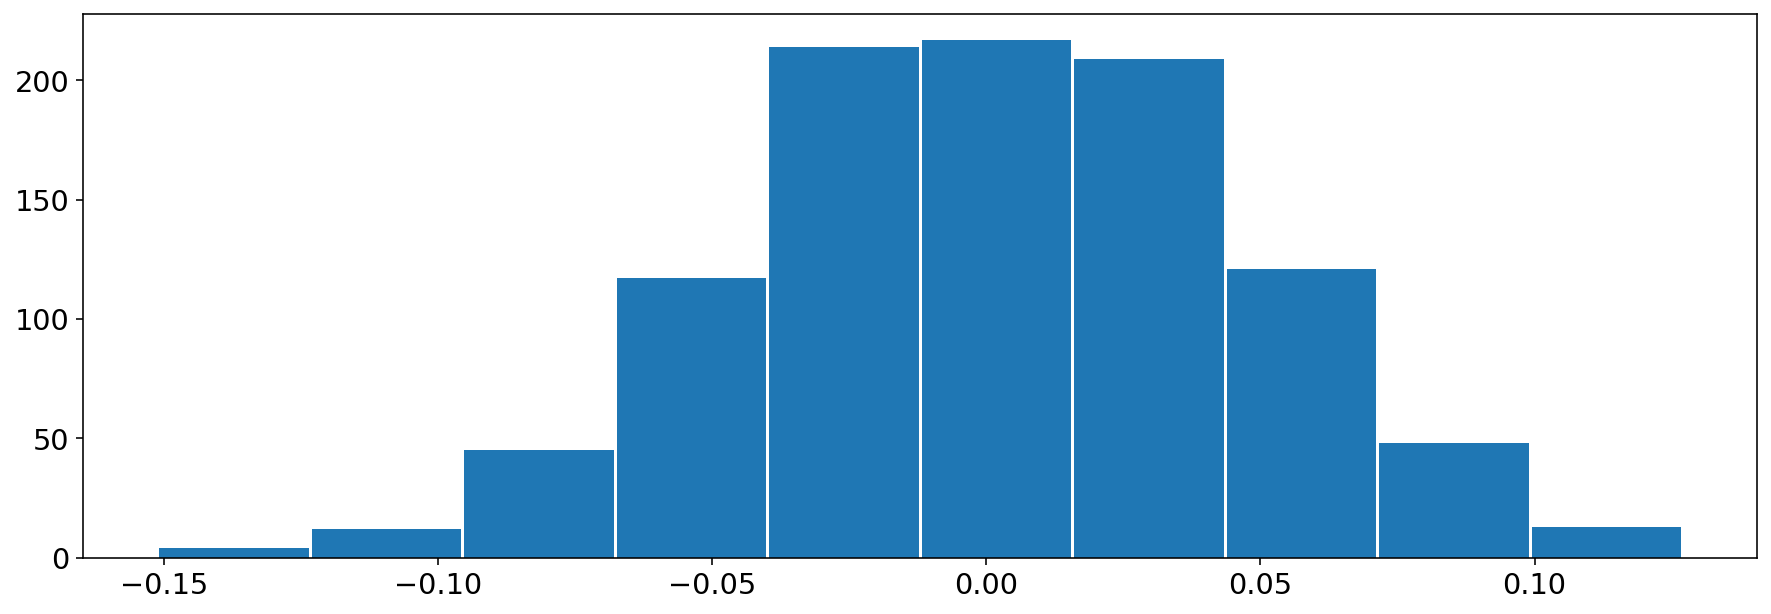

In [3]:
#2.2
M=1000
Ndraws=100

scov=np.zeros(M);

for j in range(M):
    X=stats.uniform.rvs(loc=-1,scale=2,size=Ndraws);
    Y=np.zeros([Ndraws]);
    for i in range(Ndraws):
        Y[i]=stats.norm.rvs(loc=0,scale=np.abs(X[i]),size=1);
    scov[j]=1/(Ndraws-1)*np.sum((X-np.mean(X))*(Y-np.mean(Y)));

plt.hist(scov,rwidth=0.98); 
print(np.mean(scov))

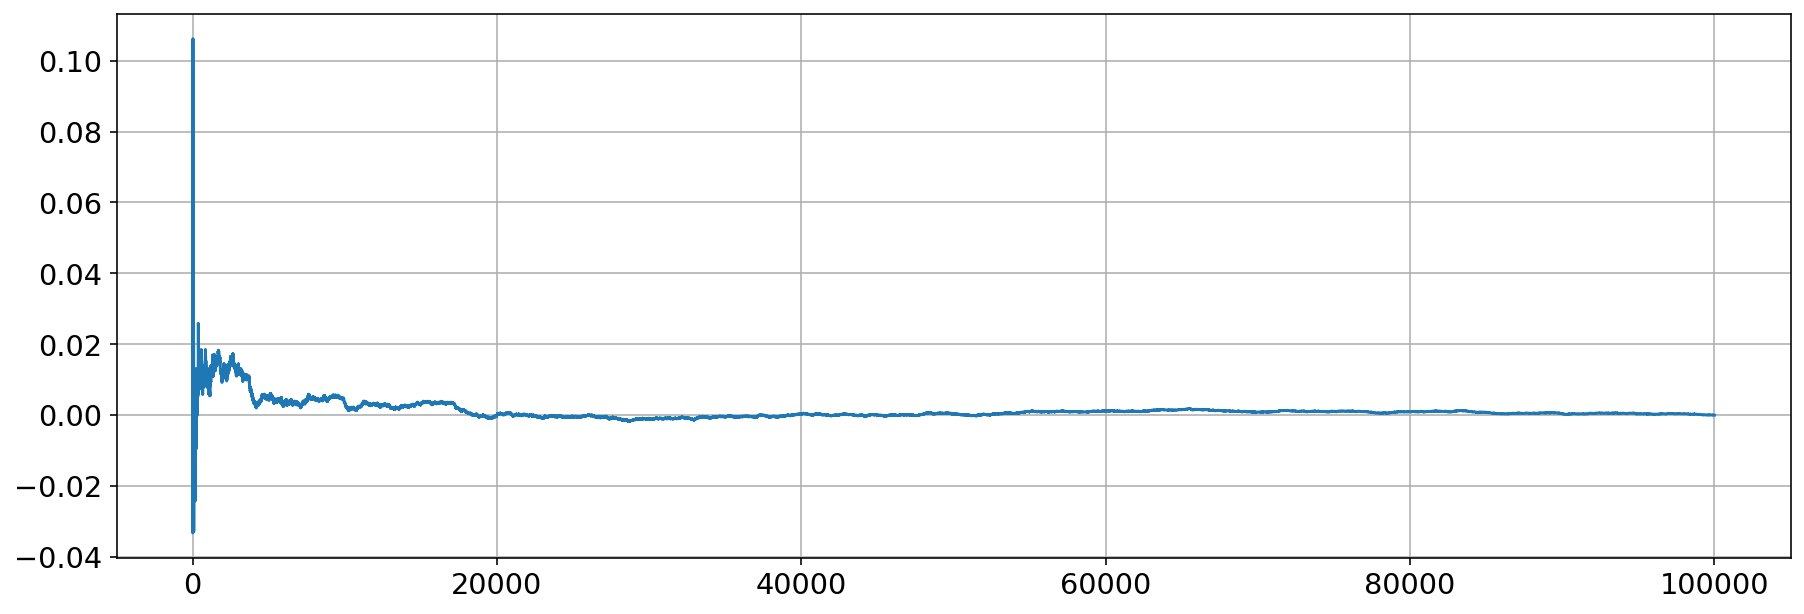

In [4]:
#2.3
Ndraws=100000
scov=np.zeros(Ndraws)


X=stats.uniform.rvs(loc=-1,scale=2,size=Ndraws)
Y=np.zeros([Ndraws])
for i in range(Ndraws):
    Y[i]=stats.norm.rvs(loc=0,scale=np.abs(X[i]),size=1)
    if i>1:
        scov[i]=1/(i-1)*np.sum((X[0:i]-np.mean(X[0:i]))*(Y[0:i]-np.mean(Y[0:i])))

plt.plot(scov)   
plt.grid()

<hr style="border:2px solid black"> </hr>

# Exercise 3: Central Limit Theorem
The central limit theorem says that the distribution of the sample mean of **any** random variable approaches a normal distribution. 

**Theorem** Let $ X_1, \cdots , X_n  $ be $n$ independent and identically distributed (i.i.d) random variables with expectation $\mu$ and variance $\sigma^2$. The distribution of the sample mean $\overline X_n=\frac{1}{n}\sum_{i=1}^n X_i$ approaches the distribution of a gaussian

$$\overline X_n \sim \mathcal N (\mu,\sigma^2/n),$$
for large $n$.
 
In this exercise, you will convince yourself of this theorem numerically. Here is a recipe for how to do it:
- Pick your probability distribution. The CLT even works for discrete random variables!
- Generate a random $n \times m$ matrix ($n$ rows, $m$ columns) of realizations from that distribution.
- For each column, find the sample mean $\overline X_n$ of the $n$ samples, by taking the mean along the first (0-th) dimension. You now have $m$ independent realizations of the sample mean $\overline X_n$. 
- You can think of each column as an experiment where you take $n$ samples and average over them. We want to know the distribution of the sample-mean. The $m$ columns represent $m$ experiments, and thus provide us with $m$ realizations of the sample mean random variable. From these we can approximate a distribution of the sample mean (via, e.g. a histogram). 
- On top of the histogram of the sample mean distribution, plot the pdf of a normal distribution with the same process mean and process variance as the sample mean of the distribution of $\overline X_n$. 


##  Question 1: Continuous random variables:
Demonstrate, numerically, that the sample mean of a number of Gamma-distributed random variables is approximately normal. https://en.wikipedia.org/wiki/Gamma_distribution

Plot the distribution of the sample mean for $n=[1,5,25,100]$,using $m=10,000$, and overlay it with a normal pdf. For best visualization,use values of $\alpha=1$ loc$=0$, scale=$1$ for the gamma distribution; 30 bins for the histogram; and set the x-limits of [0,4] for all four values of $n$.


### Answer:

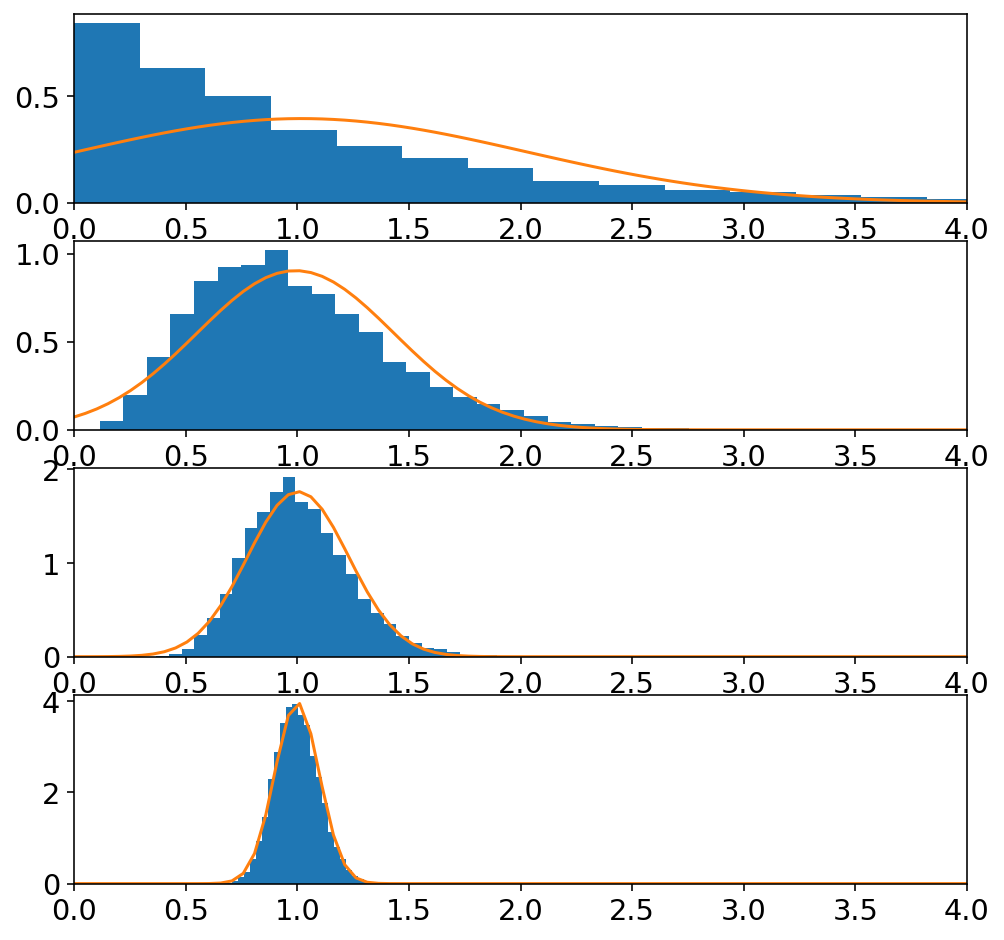

In [22]:
m=10000
n=[1,5,20,100]
Nbins=30

fig,ax=plt.subplots(4,1,figsize=[8,8])

alpha=1;
loc=0;
scale=1;
for j in range(4):
    x=stats.gamma.rvs(alpha,loc=loc,scale=scale,size=[n[j],m])
    sample_mean=np.mean(x,axis=0);

    z=np.linspace(0,5,100);
    norm_pdf=stats.norm.pdf(z,loc=np.mean(sample_mean),scale=np.std(sample_mean));

    ax[j].hist(sample_mean,Nbins,rwidth=1,density=True)
    ax[j].plot(z,norm_pdf);
    ax[j].set_xlim(left=0,right=4)

##  Question 2: Discrete random variables:
Demonstrate, numerically, that the sample mean of a large number of random dice throws is approximately normal. 

Simulate the dice using a discrete uniform random variables <code>stats.randint.rvs</code>, taking values from 1 to 6 (remember Python is right exclusive). The sample mean $\overline X_n$ is thus equivalnt to the average value of the dice throw $n$ throws.

Plot the normalized (density=True) histogram for $n=[1,2,25,200]$, using $m=100,000$, and overlay it with a normal pdf. For best visualization use 50 bins for the histogram, and set the x-limits of [1,6] for all four values of $n$.

### Answer

In [ ]:
m=100000
n=[1,2,25,200]
Nbins=50

fig,ax=plt.subplots(4,1,figsize=[16,8])

alpha=1;
loc=0;
scale=1;
for j in range(4):
    x=stats.randint.rvs(1,7,size=[n[j],m])
    sample_mean=np.mean(x,axis=0);

    z=np.linspace(0,7,1000);
    norm_pdf=stats.norm.pdf(z,loc=np.mean(sample_mean),scale=np.std(sample_mean));

    ax[j].hist(sample_mean,Nbins,rwidth=1,density=True)
    ax[j].plot(z,norm_pdf);
    ax[j].set_xlim(left=1,right=6)

## Question 3: Precip in Urbana
Plot the histograms of precipitation in urbana on hourly, daily, monthly, and annual time scales. What do you observe?

For convenience, I've downloaded 4-times daily hourly data from ERA5 for the gridcell representing Urbana. We'll use xarray since it makes it very easy to compute daily-, monthly-, and annual-total precipitation. 

The cell below computes hourly, daily, monthly, and annual values of precipitation. All you have to do is plot their histograms

In [42]:
import xarray as xr
#convert from m/hr to inches/hr, taking into account we only sample 4hrs of the day 
ds=xr.open_dataset('/data/keeling/a/cristi/SIMLES/data/ERA5precip_urbana_1950-2021.nc');
unit_conv=1000/24.5*6

pr_hr =ds.tp*unit_conv;
pr_day =pr_hr.resample(time='1D').sum('time')
pr_mon=pr_hr.resample(time='1M').sum('time')
pr_yr =pr_hr.resample(time='1Y').sum('time')

Nbins=15;


### Answer 

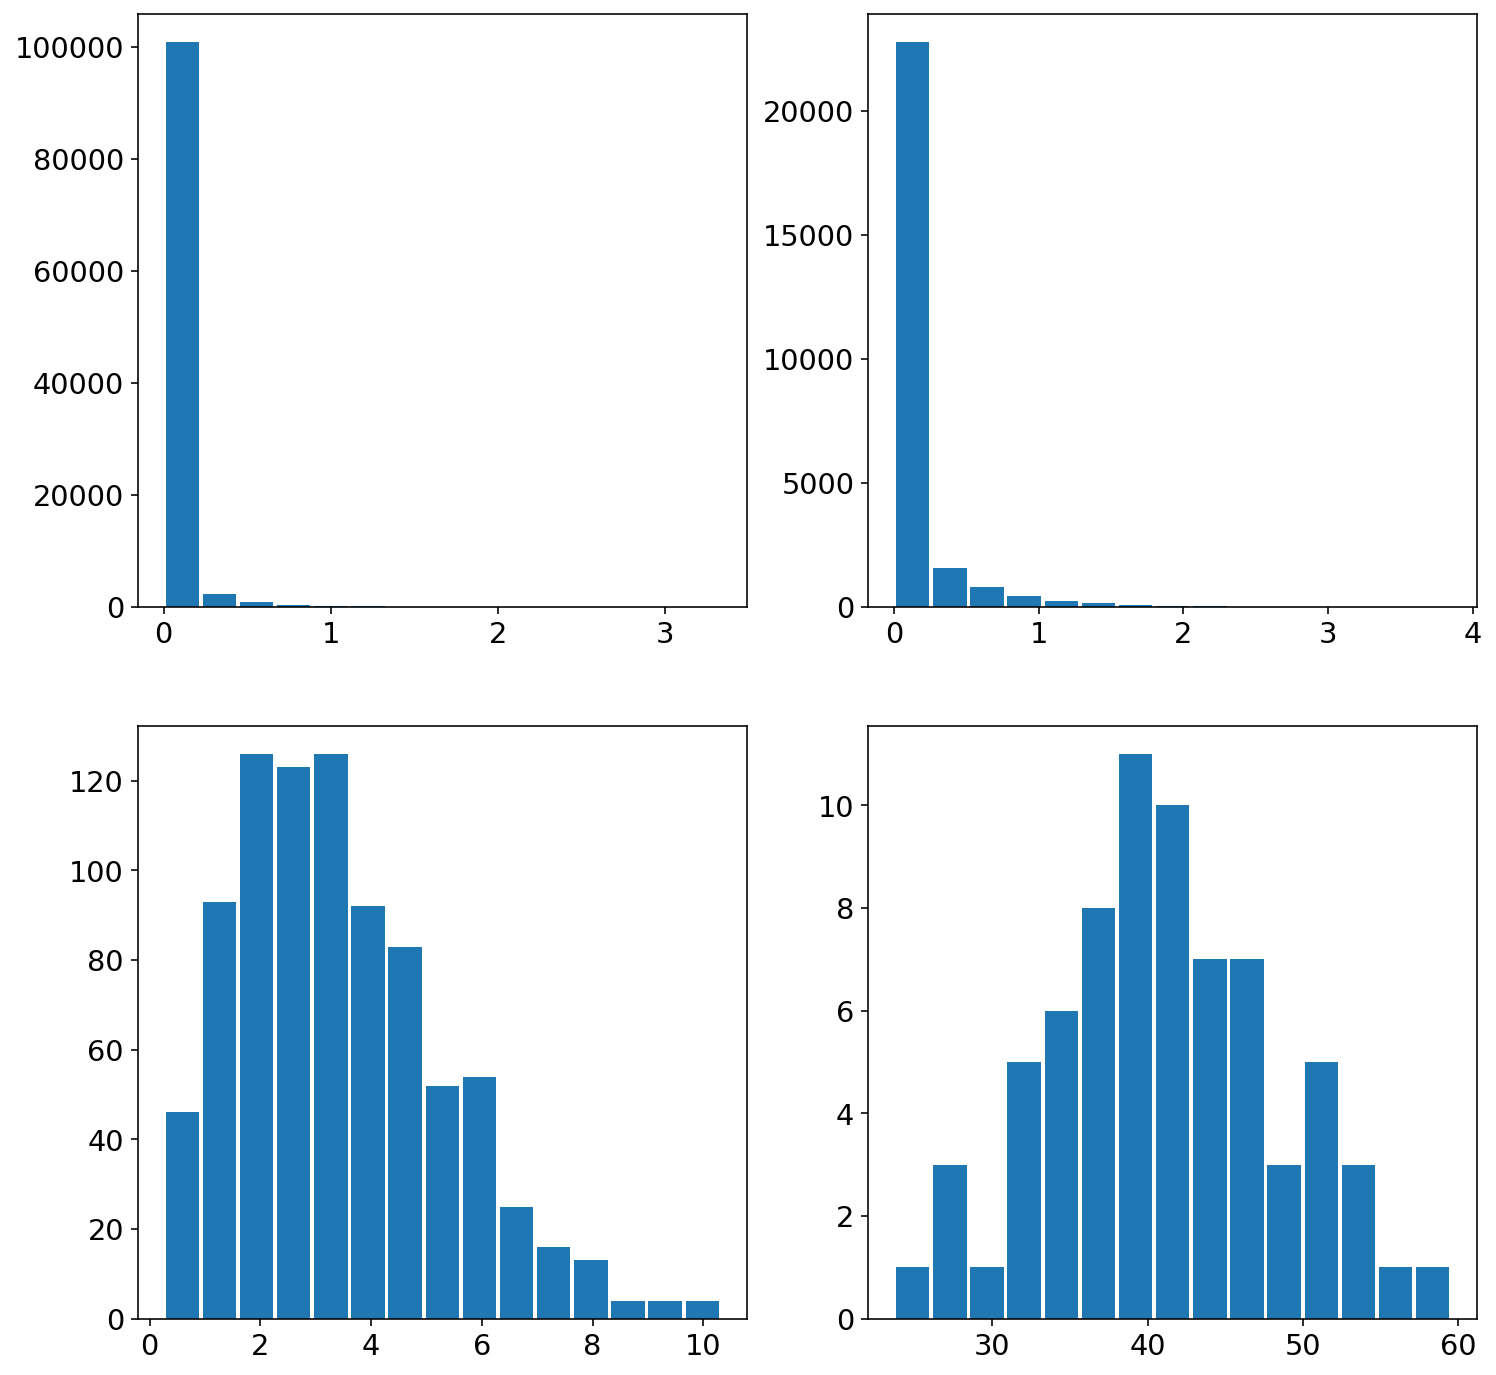

In [41]:
Nbins=15
fig,ax=plt.subplots(2,2,figsize=[12,12]);
ax[0,0].hist(pr_hr,Nbins,rwidth=0.9);
ax[0,1].hist(pr_day,Nbins,rwidth=0.9);
ax[1,0].hist(pr_mon,Nbins,rwidth=0.9);4
ax[1,1].hist(pr_yr,Nbins,rwidth=0.9);

<hr style="border:2px solid black"> </hr>

# Exercise 4: Houston precipitation return times via MLE
In the wake of Hurricane Harvey, many have described the assocaited flooding as a "500-year event". How can this be, given that in most places there are only a few decades of data available? In this exercise we apply a simple (and most likely wrong) methodology to estimate _return periods_, and comment on the wisdom of that concept.

Let's load and get to know the data. We are looking at daily precip data (in cm) at Beaumont Research Center and Port Arthur, two of the weather stations in the Houston area that reported very high daily precip totals. 

The data comes from NOAA GHCN:<br>
https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00410613/detail<br>
https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00012917/detail


In [256]:
# read data and take a cursory look
#df=pd.read_csv('/data/keeling/a/cristi/SIMLES/data/Beaumont_precip.csv')
df=pd.read_csv('/data/keeling/a/cristi/SIMLES/data/PortArthur_precip.csv')
df.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP
0,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-01,NaN,NaN,0.0
1,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-02,NaN,NaN,0.0
2,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-03,NaN,NaN,0.0
3,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-04,NaN,NaN,0.0
4,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-05,NaN,NaN,0.0


Text(0, 0.5, 'Daily Precip (cm)')

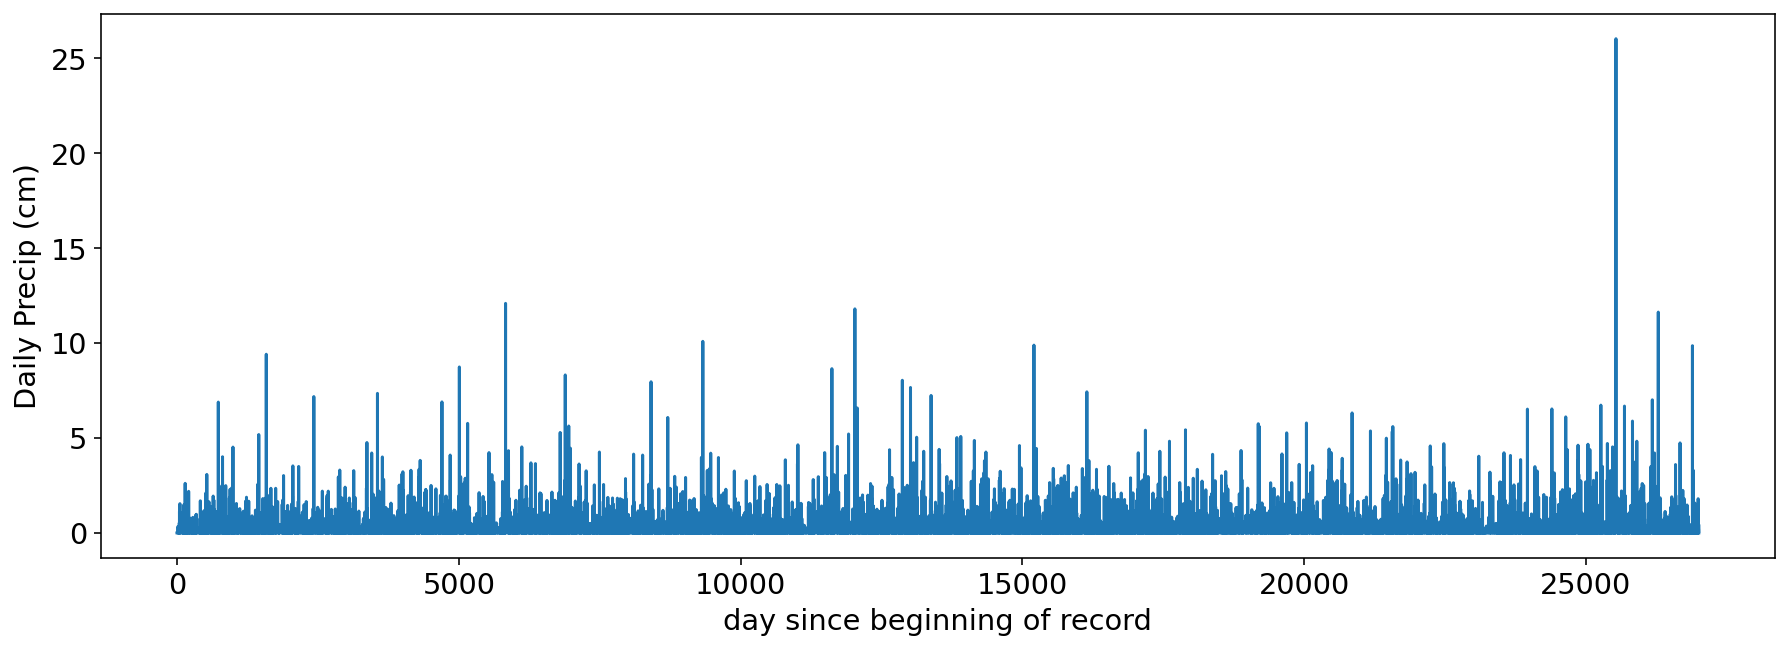

In [257]:
# plot raw precipitation
precip_raw=df['PRCP'].values
precip_raw=precip_raw[np.isnan(precip_raw)==False] # take out nans

fig,ax=plt.subplots(1,1)
ax.plot(precip_raw)
ax.set_xlabel('day since beginning of record')
ax.set_ylabel('Daily Precip (cm)')

Text(0, 0.5, 'count (number of days)')

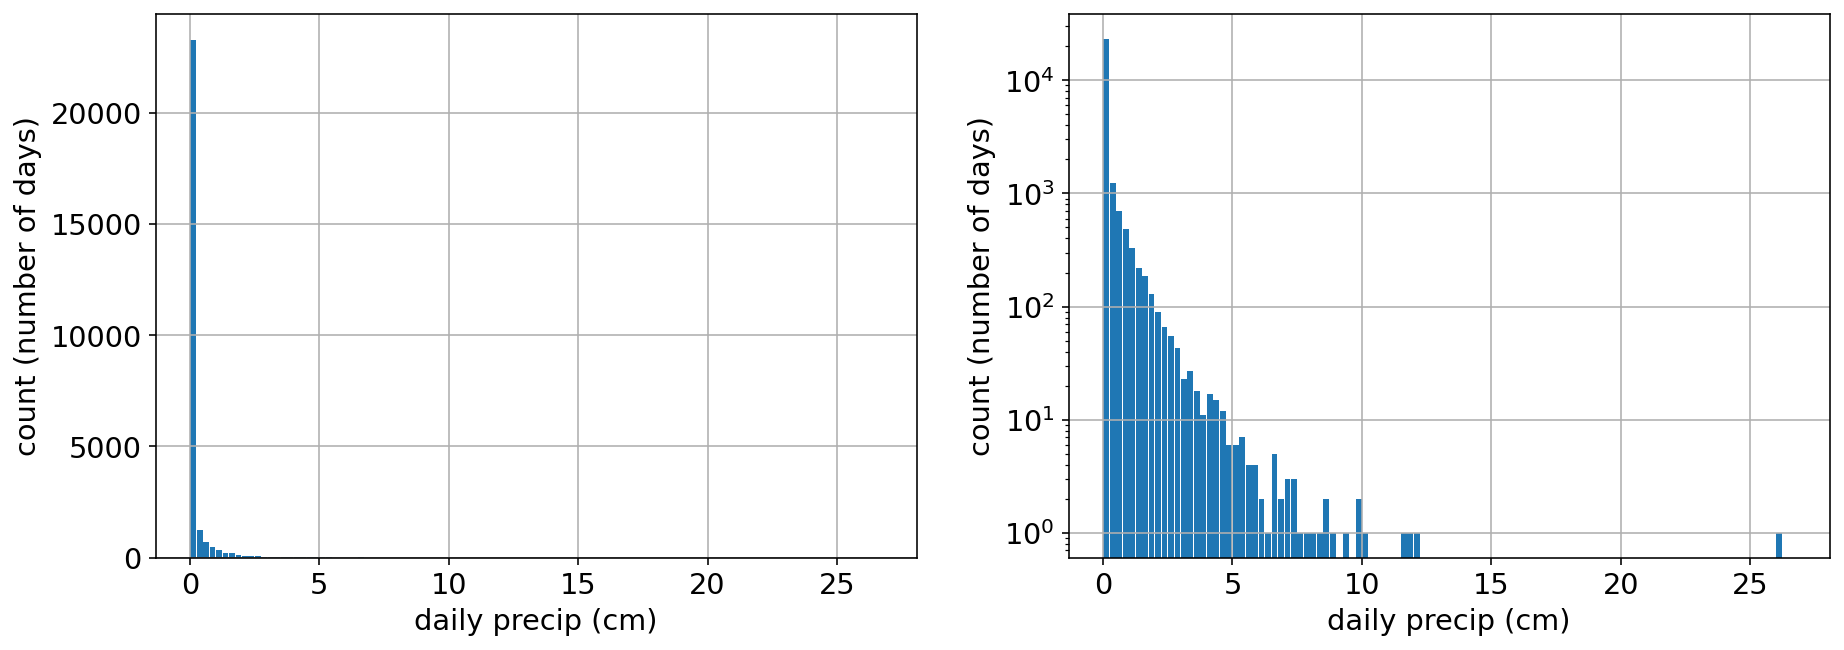

In [258]:
# Plot the histogram of the data. 
# For distributions such as a gamma distribution it makes sense to use a logarithmic axis.
#define bin edges and bin widths. 
# we'll use the maximum value in the data to define the upper limit

bin_edge_low=0
bin_edge_high=np.round(np.max(precip_raw)+1);
bin_width=0.25
bin_edges=np.arange(bin_edge_low,bin_edge_high,bin_width)

fig,ax=plt.subplots(1,2)
ax[0].hist(precip_raw,bin_edges,rwidth=0.9);
ax[0].set_xlabel('daily precip (cm)')
ax[0].set_ylabel('count (number of days)')
ax[0].grid()

ax[1].hist(precip_raw,bin_edges,rwidth=0.9)
ax[1].set_yscale('log')
ax[1].grid()
ax[1].set_xlabel('daily precip (cm)')
ax[1].set_ylabel('count (number of days)')

Text(0, 0.5, 'count (number of days)')

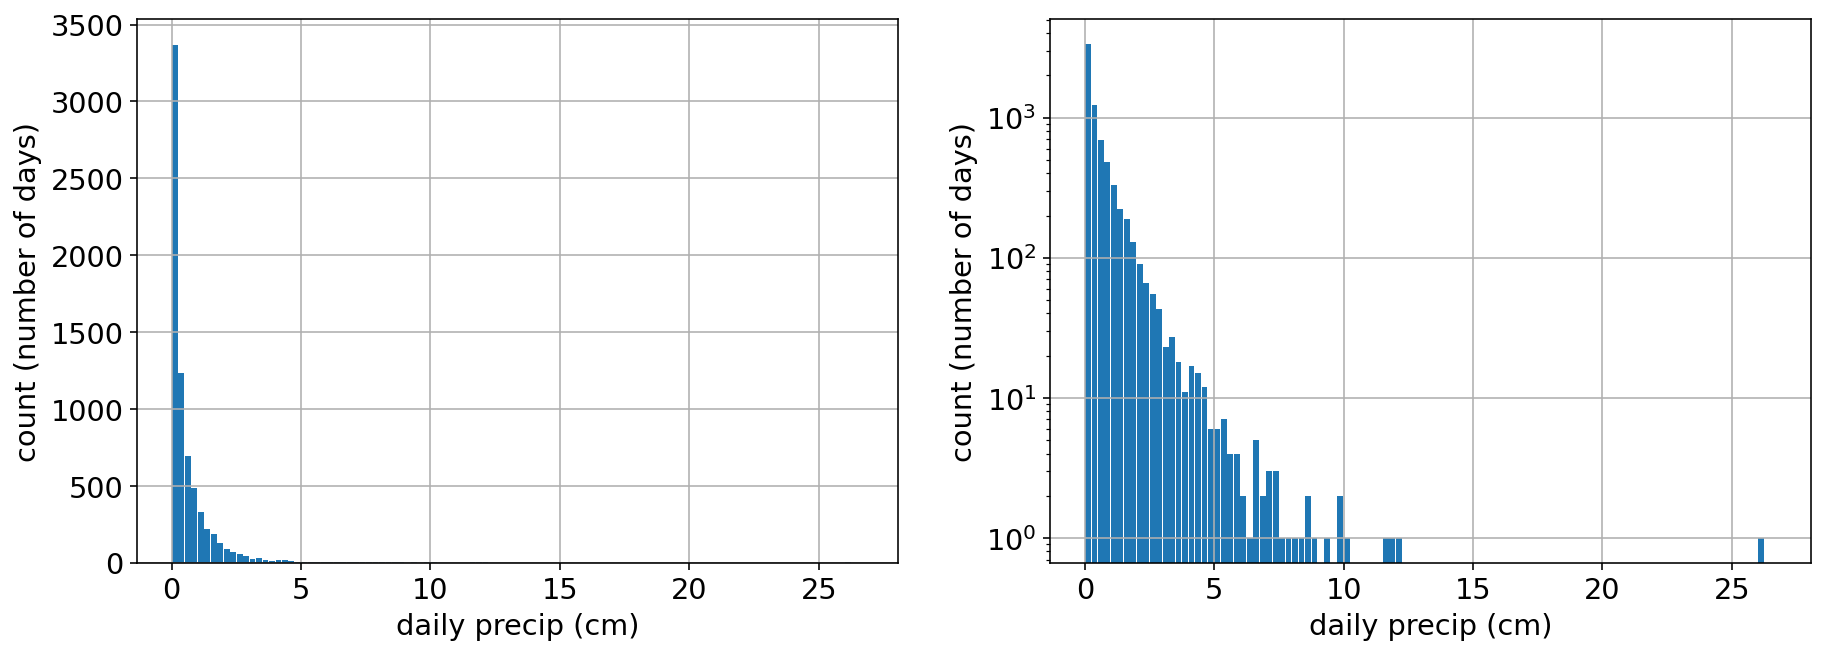

In [259]:
# the jump in the first bin indicates a probability mass at 0  ( a large number of days do not see any precipitation). 
# Let's only look at days when it rains. While we're at it, let's clean NaNs as well.
precip=precip_raw[precip_raw>0.01]

# Plot the histogram of the data
fig,ax=plt.subplots(1,2)
ax[0].hist(precip,bin_edges,rwidth=0.9);
ax[0].set_xlabel('daily precip (cm)')
ax[0].set_ylabel('count (number of days)')
ax[0].grid()
ax[0].set_xlabel('daily precip (cm)')
ax[0].set_ylabel('count (number of days)')

ax[1].hist(precip,bin_edges,rwidth=0.9)
ax[1].set_yscale('log')
ax[1].grid()
ax[1].set_xlabel('daily precip (cm)')
ax[1].set_ylabel('count (number of days)')


## Question 1: 
Fit an gamma distribution to the data, using the <code>stats.gamma.fit</code> method to obtain maximum likelihood estimates for the parameters. 
Show the fit by overlaying the pdf of the gamma distribution with mle parameters on top of the histogram of daily precipitation at Beaumont Research Center. 

Hints:
- you'll need to show a *density* estimate of the histogram, unlike the count i.e. ensure <code>density=True</code>. 
- The method will output the thre parameters of the gamma random variable: <code>a,loc,scale</code> (see documentation <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html"> here</a>). So you'll need to call it as <code>alpha_mle,loc_mle,scale_mle=stats.gama.fit( .... )</code>


### Answer:

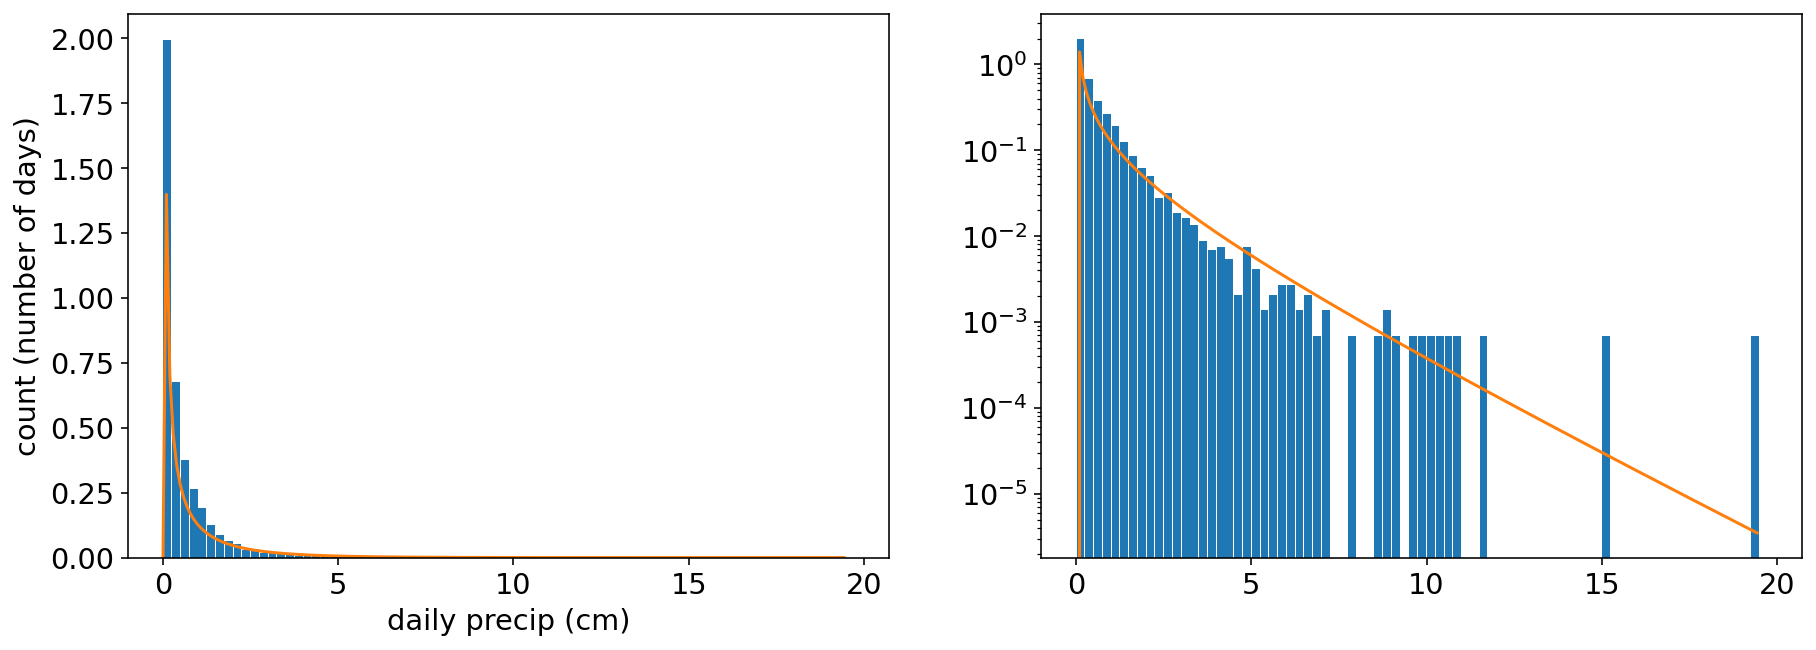

In [253]:
alpha_mle,loc_mle,scale_mle=stats.gamma.fit(precip)
x_plot=np.linspace(0,np.max(precip),200)
gamma_pdf=stats.gamma.pdf(x_plot,alpha_mle,loc_mle,scale_mle)


# Plot the histogram of the data
fig,ax=plt.subplots(1,2)
ax[0].hist(precip,bin_edges,rwidth=0.9,density=True);
ax[0].set_xlabel('daily precip (cm)')
ax[0].set_ylabel('count (number of days)')

ax[1].hist(precip,bin_edges,rwidth=0.9,density=True)
ax[1].set_yscale('log')

ax[0].plot(x_plot,gamma_pdf)
ax[1].plot(x_plot,gamma_pdf)

In [263]:
np.max(precip)

26.03

## Question 2:
Compute the return time of the rainiest day recorded at Beaumont Research Center (in years).

What does this mean? The rainiest day at Beaumont brought $x$ cm. The return time represents how often we would expect to get $x$ cm or more of rain at Beaumont. 

To compute the return time we need to compute the probability of daily rain >$x$ cm. The inverse of this probability is the frequency of daily rain >$x$ cm. 

For example, if the probability of daily rain > 3 cm =1/30, it means we would expect that it rains 3 cm or more once about every 30 day, and we would say 3 cm is a 10 day event. 

For the largest precip event the probability will be significantly smaller, and thus the return time significantly larger

*Hint*: Remember that the probability of daily rain being *less* than $x$ cm is given by the CDF: $$F(x)=P(\text{daily rain}<x\text{ cm})$$. 
*Hint*: The answer should only take a very small number of lines of code

### Answer

In [264]:
gamma_F=stats.gamma.cdf(x_plot,alpha_mle,loc_mle,scale_mle)
prob=1-stats.gamma.cdf(np.max(precip),alpha_mle,loc_mle,scale_mle)
1/prob/365

4080713.548079735

## Question 3:
Repeat the analysis for the Port Arthur data. If you fit a Gamma ditribution and compute the return time of the largest daily rain event, what is the return time? 

Does that seem reasonable? Why do you think the statistical model fails here? Think of the type of precipitation events that make up the precipitation data at Port Arthur

{
    "tags": [
        "margin",
    ]
}

### Answer

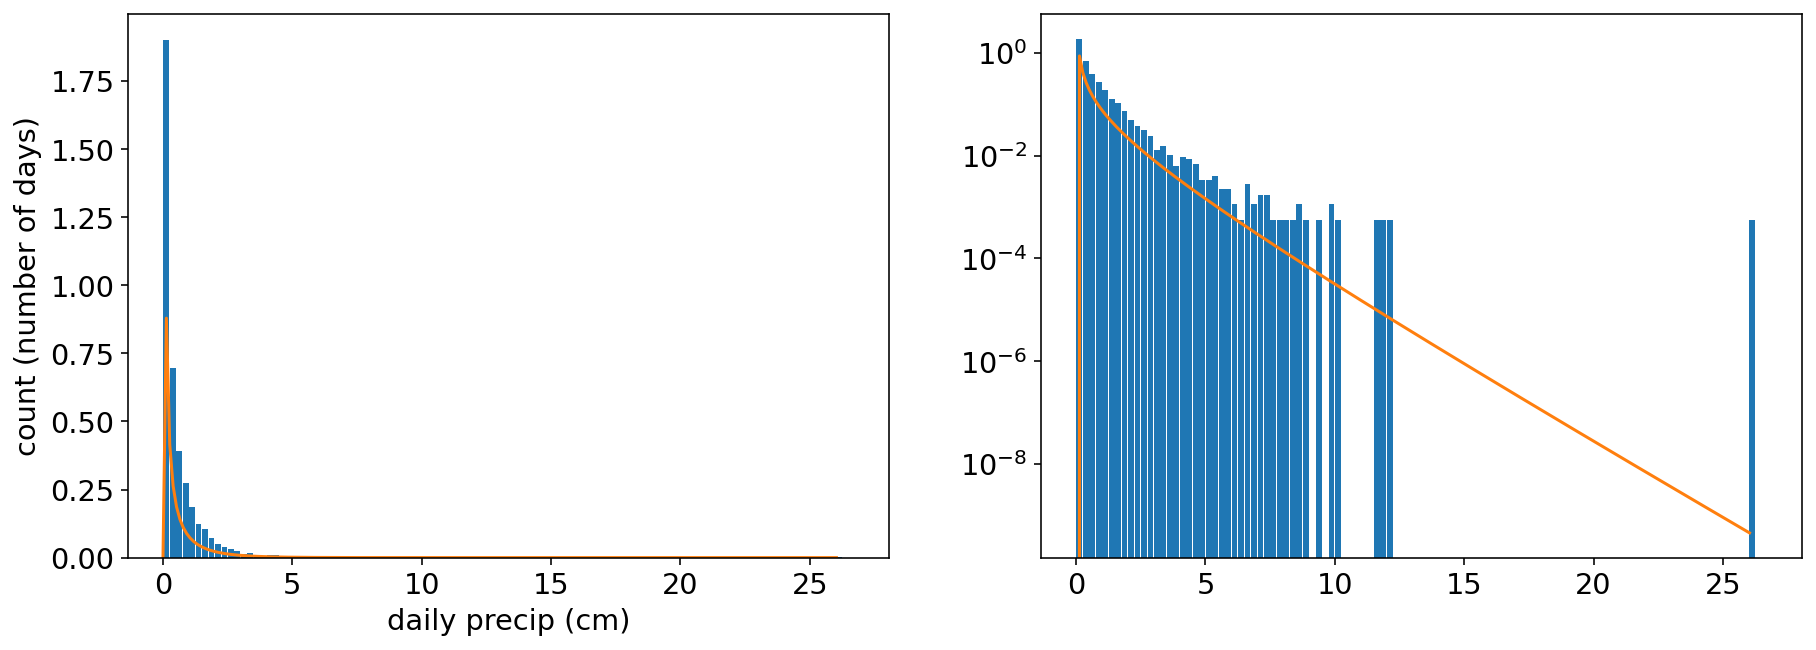

In [260]:
# read data and take a cursory look
df=pd.read_csv('/data/keeling/a/cristi/SIMLES/data/PortArthur_precip.csv')
df.head()

# plot raw precipitation
precip_raw=df['PRCP'].values
precip_raw=precip_raw[np.isnan(precip_raw)==False] # take out nans
precip=precip_raw[precip_raw>0.01]


alpha_mle,loc_mle,scale_mle=stats.gamma.fit(precip)
x_plot=np.linspace(0,np.max(precip),200)
gamma_pdf=stats.gamma.pdf(x_plot,alpha_mle,loc_mle,scale_mle)


# Plot the histogram of the data
fig,ax=plt.subplots(1,2)
ax[0].hist(precip,bin_edges,rwidth=0.9,density=True);
ax[0].set_xlabel('daily precip (cm)')
ax[0].set_ylabel('count (number of days)')

ax[1].hist(precip,bin_edges,rwidth=0.9,density=True)
ax[1].set_yscale('log')

ax[0].plot(x_plot,gamma_pdf)
ax[1].plot(x_plot,gamma_pdf)



In [261]:
gamma_F=stats.gamma.cdf(x_plot,alpha_mle,loc_mle,scale_mle)
prob=1-stats.gamma.cdf(np.max(precip),alpha_mle,loc_mle,scale_mle)
1/prob/365

4080713.548079735